# Start of PCA:

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
one_hot_encoded_df2 = pd.read_csv('data/model/actReading_11.csv')



In [2]:
# Dropping the specified columns
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'proficient_score'])


In [3]:
one_hot_encoded_df2.head()

,is_proficient,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [24]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'measurementTypeId',
 'subgroup_lunchStatus',
 'is_proficient',
 'proficient_score',
 'proficient_diff',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_

## PCA

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `encoded_final_df` is your current DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['is_proficient']))

In [5]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.8031976486267409


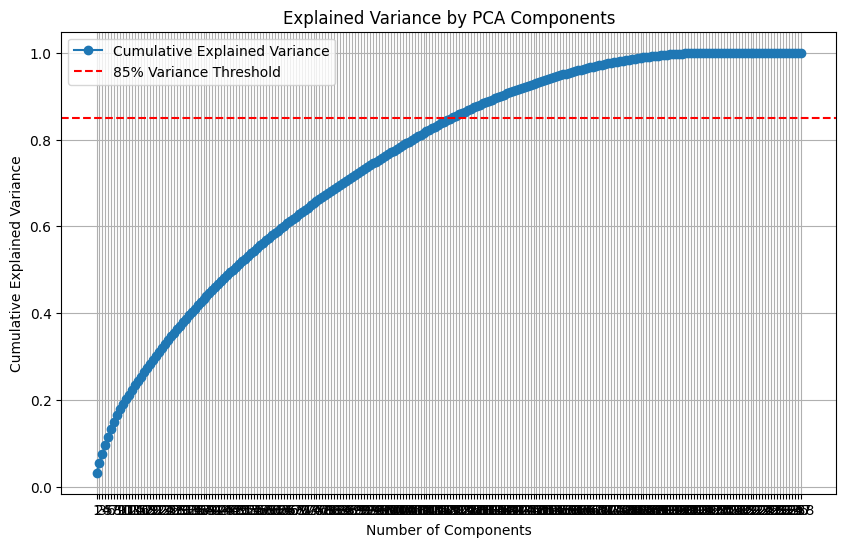

Number of components needed: 121


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is already defined and contains your scaled data
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 85% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [7]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [8]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [10]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
1,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
2,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
3,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
4,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.278231,-0.779888,0.890313,-0.702643,1.236055,-0.559061,-1.334703,-3.005750,-1.924258,-0.163495,...,-0.000267,0.000130,0.000065,0.000158,0.001174,-0.001959,0.002060,0.001025,-0.001862,0.003682
3831,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3832,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3833,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902


In [12]:
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['is_proficient']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'school_High School A', 'course_Panther Adv', 'course_HISTUS1877AC']
Top features for PC5: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_Ess: E & SS', 'course_TranSer 11']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

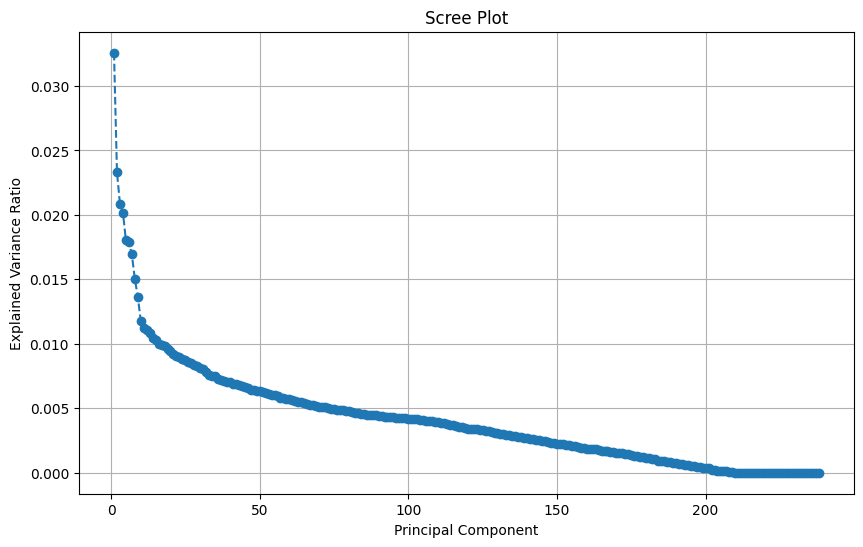

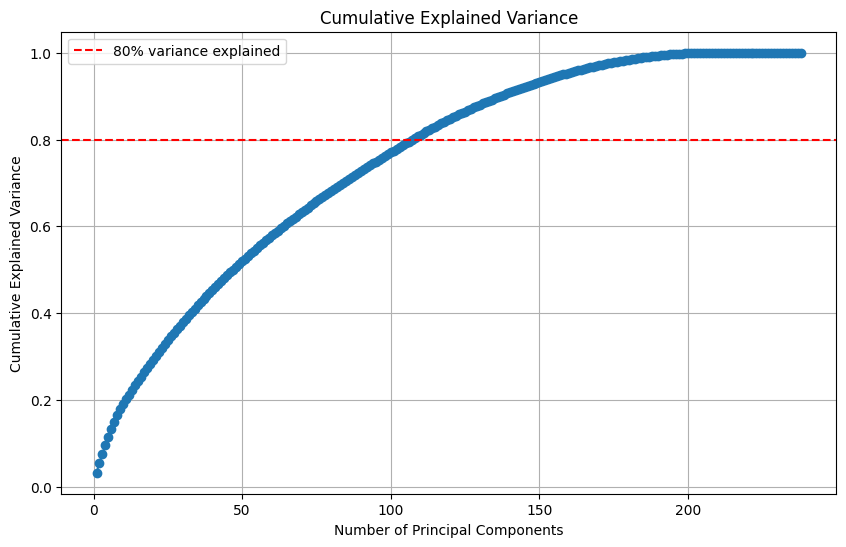

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
1,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
2,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
3,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
4,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.278231,-0.779888,0.890313,-0.702643,1.236055,-0.559061,-1.334703,-3.005750,-1.924258,-0.163495,...,-0.000267,0.000130,0.000065,0.000158,0.001174,-0.001959,0.002060,0.001025,-0.001862,0.003682
3831,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3832,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3833,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902


## final catboost binary model

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6720129	test: 0.6726037	best: 0.6726037 (0)	total: 164ms	remaining: 1m 22s
50:	learn: 0.4435309	test: 0.4699009	best: 0.4699009 (50)	total: 753ms	remaining: 6.63s
100:	learn: 0.3766038	test: 0.4124299	best: 0.4124299 (100)	total: 1.41s	remaining: 5.56s
150:	learn: 0.3430403	test: 0.3823481	best: 0.3823481 (150)	total: 2s	remaining: 4.62s
200:	learn: 0.3291507	test: 0.3697220	best: 0.3697220 (200)	total: 2.6s	remaining: 3.87s
250:	learn: 0.3225317	test: 0.3623677	best: 0.3623677 (250)	total: 3.2s	remaining: 3.17s
300:	learn: 0.3186261	test: 0.3593083	best: 0.3593083 (300)	total: 3.79s	remaining: 2.51s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3582465938
bestIteration = 325

Shrink model to first 326 iterations.
Confusion Matrix:
[[352  49]
 [125 241]]
Accuracy: 0.77
Macro F1 Score: 0.77

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.88      0.80       401
        True       0.83      0.6

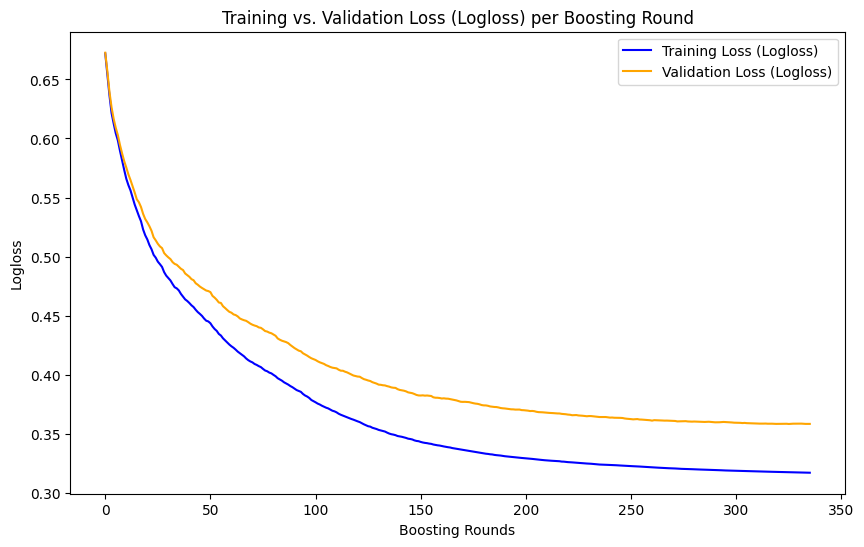

In [24]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Step 3: Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Step 4: Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model for Binary Classification
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='Logloss',  # Use Logloss for binary classification
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make probability predictions and convert to binary class predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold at 0.5

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training vs. validation loss
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['Logloss']
validation_loss = eval_history['validation']['Logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (Logloss)', color='blue')
plt.plot(validation_loss, label='Validation Loss (Logloss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Logloss')
plt.title('Training vs. Validation Loss (Logloss) per Boosting Round')
plt.legend()
plt.show()


## Binary XGBoost model

Cross-Validated Accuracy: 0.75
[0]	train-logloss:0.66208	eval-logloss:0.66621
[1]	train-logloss:0.63568	eval-logloss:0.64077
[2]	train-logloss:0.61326	eval-logloss:0.62052
[3]	train-logloss:0.59275	eval-logloss:0.60096
[4]	train-logloss:0.57465	eval-logloss:0.58472
[5]	train-logloss:0.55765	eval-logloss:0.56827
[6]	train-logloss:0.54457	eval-logloss:0.55577
[7]	train-logloss:0.53186	eval-logloss:0.54408
[8]	train-logloss:0.52170	eval-logloss:0.53368
[9]	train-logloss:0.50872	eval-logloss:0.52035
[10]	train-logloss:0.49681	eval-logloss:0.51005
[11]	train-logloss:0.48649	eval-logloss:0.50115
[12]	train-logloss:0.47576	eval-logloss:0.49109
[13]	train-logloss:0.46847	eval-logloss:0.48458
[14]	train-logloss:0.46104	eval-logloss:0.47677
[15]	train-logloss:0.45270	eval-logloss:0.47021
[16]	train-logloss:0.44674	eval-logloss:0.46613
[17]	train-logloss:0.44054	eval-logloss:0.46143
[18]	train-logloss:0.43439	eval-logloss:0.45522
[19]	train-logloss:0.42883	eval-logloss:0.44988
[20]	train-logloss:

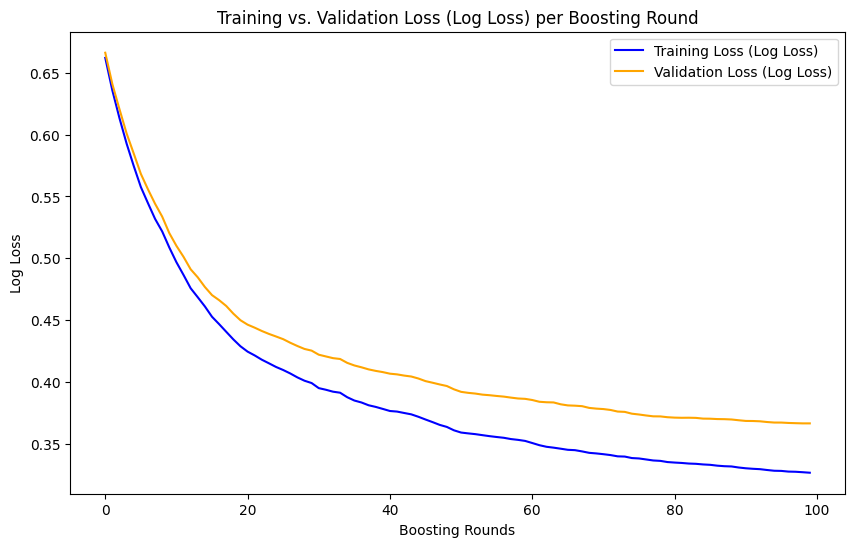

Accuracy: 0.77
Macro F1 Score: 0.77
Confusion Matrix:
[[350  51]
 [125 241]]


In [23]:
from xgboost import XGBClassifier, DMatrix, train
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBClassifier with additional regularization and reduced complexity
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'binary:logistic',  # Binary classification objective
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract training and validation losses from evals_result
train_loss = evals_result['train']['logloss']
validation_loss = evals_result['eval']['logloss']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (Log Loss)', color='blue')
plt.plot(validation_loss, label='Validation Loss (Log Loss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs. Validation Loss (Log Loss) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred_prob = xgb_model_trained.predict(dtest)
xgb_y_pred = (xgb_y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, xgb_y_pred)
macro_f1 = f1_score(y_test, xgb_y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


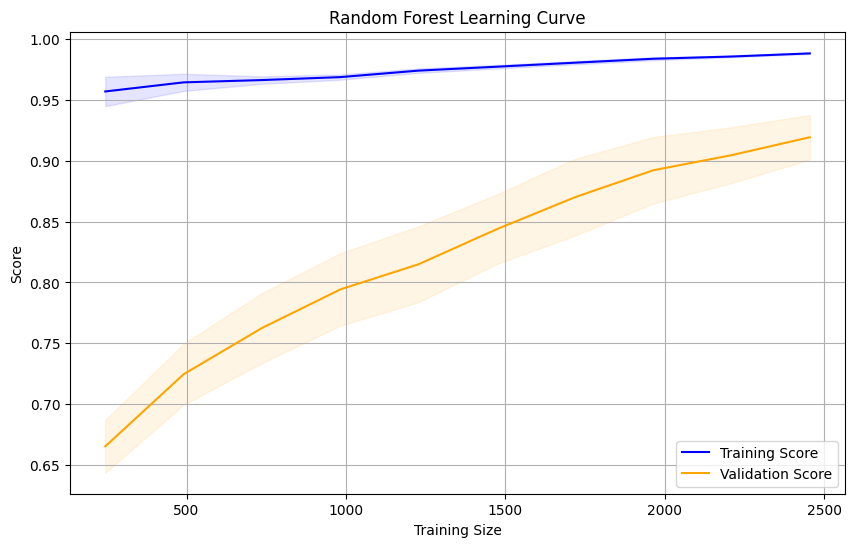

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation for training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation for validation scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')

    # Plotting the standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

    # Adding titles and labels
    plt.title('Random Forest Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with your Random Forest model and data
plot_learning_curve(rf_model, X_train, y_train)


In [121]:
from sklearn.svm import SVR

# Train Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Evaluate
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)

print(f"Support Vector Regressor - MSE: {svr_mse:.2f}, R²: {svr_r2:.2f}, RMSE: {svr_rmse:.2f}")


Support Vector Regressor - MSE: 0.01, R²: 0.82, RMSE: 0.08


In [122]:
from sklearn.linear_model import ElasticNet

# Train Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)

# Predictions
en_y_pred = elastic_net_model.predict(X_test)

# Evaluate
en_mse = mean_squared_error(y_test, en_y_pred)
en_r2 = r2_score(y_test, en_y_pred)
en_rmse = np.sqrt(en_mse)

print(f"Elastic Net - MSE: {en_mse:.2f}, R²: {en_r2:.2f}, RMSE: {en_rmse:.2f}")


Elastic Net - MSE: 0.04, R²: -0.00, RMSE: 0.20


In [123]:
from sklearn.linear_model import Lasso

# Train Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {lasso_r2:.2f}, RMSE: {lasso_rmse:.2f}")


Lasso Regression - MSE: 0.03, R²: 0.33, RMSE: 0.16


In [124]:
from sklearn.linear_model import Ridge

# Train Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")


Ridge Regression - MSE: 0.31, R²: -6.99, RMSE: 0.55


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Train Random Forest
print("Training the Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)
rf_model.fit(X_train, y_train)
print("Random Forest model training completed.")

# Predictions
print("Making predictions on the test set...")
rf_y_pred = rf_model.predict(X_test)
print("Predictions completed.")

# Evaluate
print("Evaluating the model's performance...")
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}, RMSE: {rf_rmse:.2f}")


Training the Random Forest model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.8s


Random Forest model training completed.
Making predictions on the test set...
Predictions completed.
Evaluating the model's performance...
Random Forest - MSE: 0.92, R²: 0.09, RMSE: 0.96


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Predictions and Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"XGBoost - MSE: {mse:.2f}, R²: {r2:.2f}, RMSE: {rmse:.2f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
XGBoost - MSE: 0.87, R²: 0.15, RMSE: 0.93


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
}

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up Grid Search
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=1)
gb_grid_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

# Predictions
gb_y_pred = best_gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [ ]:
# Hyperparameter tuning for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
}

# Create Ridge model
ridge_model = Ridge(random_state=42)

# Set up Grid Search
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, 
                                  cv=5, scoring='neg_mean_squared_error', verbose=1)
ridge_grid_search.fit(X_train, y_train)

# Best Ridge model
best_ridge_model = ridge_grid_search.best_estimator_

# Predictions
ridge_y_pred = best_ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Best Ridge Parameters: {ridge_grid_search.best_params_}")
print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")

In [27]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare base models for stacking
print("Preparing base models for stacking...")
ridge_model = Ridge(alpha=1.0, random_state=42)
xgb_model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Create a stacking regressor
print("Creating a stacking regressor...")
stacked_model = StackingRegressor(
    estimators=[
        ('ridge', ridge_model),
        ('xgb', xgb_model),
        ('gb', gb_model)
    ],
    final_estimator=RidgeCV(alphas=np.logspace(-3, 3, 7))
)

# Step 3: Train the stacked model
print("Training the stacked model...")
stacked_model.fit(X_train, y_train)
print("Stacked model training completed.")

# Step 4: Make predictions
print("Making predictions with the stacked model...")
stacked_y_pred = stacked_model.predict(X_test)

# Step 5: Evaluate the stacked model
print("Evaluating the stacked model...")
stacked_mse = mean_squared_error(y_test, stacked_y_pred)
stacked_r2 = r2_score(y_test, stacked_y_pred)
stacked_rmse = np.sqrt(stacked_mse)

print(f"Stacked Model - MSE: {stacked_mse:.2f}, R²: {stacked_r2:.2f}, RMSE: {stacked_rmse:.2f}")

# Optional: Bagging with Ridge Regression
print("Training Bagging model with Ridge Regression...")
bagging_model = BaggingRegressor(estimator=ridge_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
print("Bagging model training completed.")

# Making predictions with Bagging model
print("Making predictions with the Bagging model...")
bagging_y_pred = bagging_model.predict(X_test)

# Evaluate Bagging Model
print("Evaluating Bagging model...")
bagging_mse = mean_squared_error(y_test, bagging_y_pred)
bagging_r2 = r2_score(y_test, bagging_y_pred)
bagging_rmse = np.sqrt(bagging_mse)

print(f"Bagging with Ridge - MSE: {bagging_mse:.2f}, R²: {bagging_r2:.2f}, RMSE: {bagging_rmse:.2f}")


Preparing base models for stacking...
Creating a stacking regressor...
Training the stacked model...
Stacked model training completed.
Making predictions with the stacked model...
Evaluating the stacked model...
Stacked Model - MSE: 0.87, R²: 0.15, RMSE: 0.93
Training Bagging model with Ridge Regression...
Bagging model training completed.
Making predictions with the Bagging model...
Evaluating Bagging model...
Bagging with Ridge - MSE: 0.88, R²: 0.14, RMSE: 0.94


In [186]:
'''
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Define the LightGBM model
print("Defining the LightGBM model...")
lgb_model = lgb.LGBMRegressor(random_state=42)

# Step 2: Set up the parameter grid for hyperparameter tuning
print("Setting up the parameter grid for hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [31, 63, 127],
    'subsample': [0.6, 0.8, 1.0],
}

# Step 3: Create a custom scoring function to track progress
def verbose_grid_search(estimator, param_grid, X, y):
    print("Starting Grid Search...")
    for n_estimators in param_grid['n_estimators']:
        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                for num_leaves in param_grid['num_leaves']:
                    for subsample in param_grid['subsample']:
                        print(f"Evaluating: n_estimators={n_estimators}, learning_rate={learning_rate}, "
                              f"max_depth={max_depth}, num_leaves={num_leaves}, subsample={subsample}")
                        # Fit the model with current parameters
                        estimator.set_params(n_estimators=n_estimators, learning_rate=learning_rate,
                                              max_depth=max_depth, num_leaves=num_leaves, subsample=subsample)
                        estimator.fit(X, y)

# Perform Grid Search with verbose output
print("Performing custom Grid Search with detailed progress...")
verbose_grid_search(lgb_model, param_grid, X_train, y_train)

# Step 4: After manually searching, you would store the best parameters manually based on your criteria.

# Step 5: Make predictions using the best model (you can specify your best parameters here)
print("Making predictions using the best LightGBM model...")
best_lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, num_leaves=31, subsample=1.0, random_state=42)
best_lgb_model.fit(X_train, y_train)
lgb_y_pred = best_lgb_model.predict(X_test)

# Step 6: Evaluate the LightGBM model
print("Evaluating the LightGBM model...")
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print(f"LightGBM - MSE: {lgb_mse:.2f}, R²: {lgb_r2:.2f}, RMSE: {lgb_rmse:.2f}")
'''

'\nimport lightgbm as lgb\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error, r2_score\nimport numpy as np\n\n# Step 1: Define the LightGBM model\nprint("Defining the LightGBM model...")\nlgb_model = lgb.LGBMRegressor(random_state=42)\n\n# Step 2: Set up the parameter grid for hyperparameter tuning\nprint("Setting up the parameter grid for hyperparameter tuning...")\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [-1, 3, 5, 7],\n    \'num_leaves\': [31, 63, 127],\n    \'subsample\': [0.6, 0.8, 1.0],\n}\n\n# Step 3: Create a custom scoring function to track progress\ndef verbose_grid_search(estimator, param_grid, X, y):\n    print("Starting Grid Search...")\n    for n_estimators in param_grid[\'n_estimators\']:\n        for learning_rate in param_grid[\'learning_rate\']:\n            for max_depth in param_grid[\'max_depth\']:\n                for num_leaves in param_grid[\'nu